<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

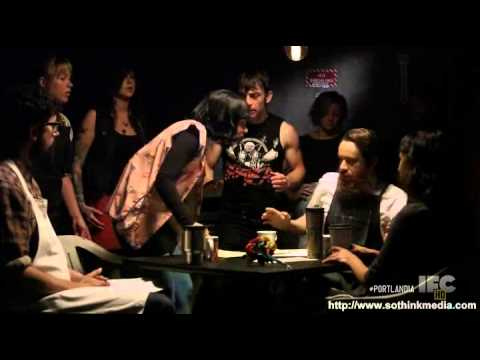

In [38]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [39]:
%pwd

'C:\\Users\\timro\\Documents\\Github\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [40]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [41]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
dtype: object

In [42]:
# Start here 

In [43]:
import re


def cleaning(text):
    clean = re.sub(r"[.,!?']", r"/1", text)
    clean = re.sub("[^a-zA-Z]+", r" ", text)
    clean = clean.lower()
    
    return clean

In [44]:
# a cleaner version of the text column
shops['clean_text'] = shops['full_review_text'].apply(cleaning)

In [45]:
#first, I want to remove the ' star rating' from the 'star_rating'column. 
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [46]:
shops['star_rating']= shops.star_rating.str.replace(' star rating', '')

In [47]:
shops['star_rating'].value_counts()

 5.0     3780
 4.0     2360
 3.0      738
 2.0      460
 1.0      278
Name: star_rating, dtype: int64

In [48]:
#Next, I can seperate the words in my 'full_review_text' column in order to iterate over it. 

In [49]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,clean_text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0,check in love love loved the atmosphere every...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0,listed in date night austin ambiance in austi...
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0,check in listed in brunch spots i loved the e...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0,very cool decor good drinks nice seating howe...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0,check in they are located within the northcro...


In [50]:
"""
Import Statements
"""
from collections import Counter

import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

#Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [51]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['clean_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [52]:
shops[['full_review_text', 'clean_text', 'tokens']][:10]

,full_review_text,clean_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,check in love love loved the atmosphere every...,"[ , check, in, love, love, loved, the, atmosph..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...",listed in date night austin ambiance in austi...,"[ , listed, in, date, night, austin, ambiance,..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,check in listed in brunch spots i loved the e...,"[ , check, in, listed, in, brunch, spots, i, l..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,very cool decor good drinks nice seating howe...,"[ , very, cool, decor, good, drinks, nice, sea..."
4,12/3/2016 1 check-in They are located within ...,check in they are located within the northcro...,"[ , check, in, they, are, located, within, the..."
5,11/20/2016 1 check-in Very cute cafe! I think...,check in very cute cafe i think from the mome...,"[ , check, in, very, cute, cafe, i, think, fro..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",check ins listed in nuptial coffee bliss ande...,"[ , check, ins, listed, in, nuptial, coffee, b..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,check ins love this place stars for cleanline...,"[ , check, ins, love, this, place, stars, for,..."
8,"10/25/2016 1 check-in Ok, let's try this appr...",check in ok let s try this approach pros musi...,"[ , check, in, ok, let, s, try, this, approach..."
9,11/10/2016 3 check-ins This place has been sh...,check ins this place has been shown on my soc...,"[ , check, ins, this, place, has, been, shown,..."


In [53]:
#lets update tokens using stop words +check check in/ins
#second update is" 's' 'm' 't' " , not sure how they ade it through

In [54]:
STOP_WORDS = nlp.Defaults.stop_words.union(['check', 'listed', 'in', 'ins', 's', 'm', 't', 'coffee', 'place',
                                            ' ', 'like', 've', 'shop', 'good', 'great', 'food', 'time'])

In [55]:
tokens = []

for doc in tokenizer.pipe(shops['clean_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [56]:
shops[['full_review_text', 'clean_text', 'tokens']][:10]

,full_review_text,clean_text,tokens
0,11/25/2016 1 check-in Love love loved the atm...,check in love love loved the atmosphere every...,"[love, love, loved, atmosphere, corner, style,..."
1,"12/2/2016 Listed in Date Night: Austin, Ambia...",listed in date night austin ambiance in austi...,"[date, night, austin, ambiance, austin, beauti..."
2,11/30/2016 1 check-in Listed in Brunch Spots ...,check in listed in brunch spots i loved the e...,"[brunch, spots, loved, eclectic, homey, plush,..."
3,11/25/2016 Very cool decor! Good drinks Nice ...,very cool decor good drinks nice seating howe...,"[cool, decor, drinks, nice, seating, overprice..."
4,12/3/2016 1 check-in They are located within ...,check in they are located within the northcro...,"[located, northcross, mall, shopping, center, ..."
5,11/20/2016 1 check-in Very cute cafe! I think...,check in very cute cafe i think from the mome...,"[cute, cafe, think, moment, stepped, wasn, did..."
6,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",check ins listed in nuptial coffee bliss ande...,"[nuptial, bliss, anderson, lane, new, black, o..."
7,11/2/2016 2 check-ins Love this place! 5 sta...,check ins love this place stars for cleanline...,"[love, stars, cleanliness, stars, fun, ambianc..."
8,"10/25/2016 1 check-in Ok, let's try this appr...",check in ok let s try this approach pros musi...,"[ok, let, try, approach, pros, music, seating,..."
9,11/10/2016 3 check-ins This place has been sh...,check ins this place has been shown on my soc...,"[shown, social, media, days, finally, visited,..."


In [57]:
# Stemming
from nltk.stem import PorterStemmer

ps= PorterStemmer()

def get_stems(tokens):
  return [ps.stem(token) for token in tokens]

shops['stems'] =shops['tokens'].apply(get_stems)

In [58]:
# WGet lemmas, no dates.
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON') and (token.is_alpha ==True)):
            lemmas.append(token.lemma_)
    
    return lemmas

In [59]:
shops['lemmas'] = shops['clean_text'].apply(get_lemmas)

In [60]:
shops[['clean_text', 'tokens', 'stems', 'lemmas']][:10]

,clean_text,tokens,stems,lemmas
0,check in love love loved the atmosphere every...,"[love, love, loved, atmosphere, corner, style,...","[love, love, love, atmospher, corner, style, s...","[check, love, love, love, atmosphere, corner, ..."
1,listed in date night austin ambiance in austi...,"[date, night, austin, ambiance, austin, beauti...","[date, night, austin, ambianc, austin, beauti,...","[list, date, night, austin, ambiance, austin, ..."
2,check in listed in brunch spots i loved the e...,"[brunch, spots, loved, eclectic, homey, plush,...","[brunch, spot, love, eclect, homey, plush, dec...","[check, list, brunch, spot, love, eclectic, ho..."
3,very cool decor good drinks nice seating howe...,"[cool, decor, drinks, nice, seating, overprice...","[cool, decor, drink, nice, seat, overpr, extra...","[cool, decor, good, drink, nice, seating, over..."
4,check in they are located within the northcro...,"[located, northcross, mall, shopping, center, ...","[locat, northcross, mall, shop, center, face, ...","[check, locate, northcross, mall, shopping, ce..."
5,check in very cute cafe i think from the mome...,"[cute, cafe, think, moment, stepped, wasn, did...","[cute, cafe, think, moment, step, wasn, didn, ...","[check, cute, cafe, think, moment, step, wasn,..."
6,check ins listed in nuptial coffee bliss ande...,"[nuptial, bliss, anderson, lane, new, black, o...","[nuptial, bliss, anderson, lane, new, black, o...","[check, in, list, nuptial, coffee, bliss, ande..."
7,check ins love this place stars for cleanline...,"[love, stars, cleanliness, stars, fun, ambianc...","[love, star, cleanli, star, fun, ambianc, open...","[check, ins, love, place, star, cleanliness, s..."
8,check in ok let s try this approach pros musi...,"[ok, let, try, approach, pros, music, seating,...","[ok, let, tri, approach, pro, music, seat, dec...","[check, ok, let, try, approach, pro, music, se..."
9,check ins this place has been shown on my soc...,"[shown, social, media, days, finally, visited,...","[shown, social, media, day, final, visit, cute...","[check, in, place, show, social, medium, day, ..."


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [61]:
#word count in class
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

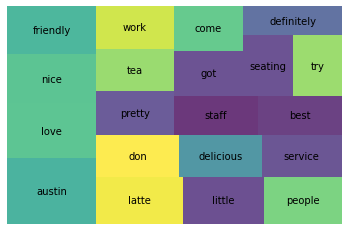

In [62]:
## testing different word/token count methods
import squarify
import matplotlib.pyplot as plt


wc = count(shops['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()


In [63]:
#interesting... white space left in somehow?

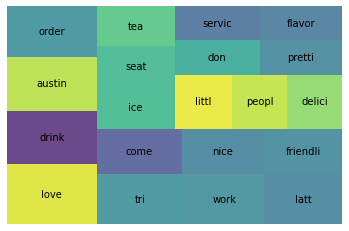

In [64]:
#stems
wc = count(shops['stems'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

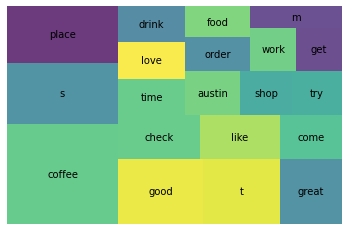

In [65]:
#lemmas
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [66]:
shops['star_rating']= shops['star_rating'].astype(float)

In [67]:
bad_shops = shops[shops['star_rating'] <= 3]
good_shops = shops[shops['star_rating'] > 3]

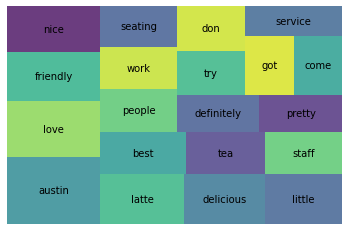

In [68]:
#tokens for good
wc = count(good_shops['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()


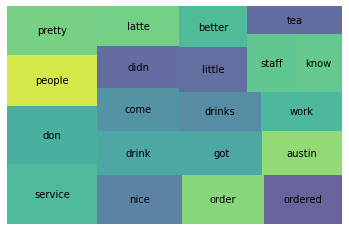

In [69]:
#tokens for BAD
wc = count(bad_shops['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [70]:
wc_bad = count(bad_shops['tokens'])
wc_good = count(good_shops['tokens'])

wc_bad.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,service,347,449,1.0,0.006338,0.006338,0.235095
163,don,351,445,2.0,0.006282,0.012620,0.237805
138,people,287,386,3.0,0.005449,0.018069,0.194444
120,pretty,285,366,4.0,0.005166,0.023235,0.193089
15,nice,283,351,5.0,0.004955,0.028190,0.191734


In [71]:
wc_good.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
39,austin,1591,2049,1.0,0.008212,0.008212,0.259121
14,love,1323,1735,2.0,0.006953,0.015165,0.215472
166,friendly,1427,1501,3.0,0.006015,0.021180,0.232410
45,nice,1191,1404,4.0,0.005627,0.026807,0.193974
20,latte,935,1358,5.0,0.005442,0.032249,0.152280


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

